<center><h2><strong><font color="blue">Pendahuluan Data Mining</font></strong></h2></center>
<center><h3><strong><font color="blue"><a href="https://tau-data.id/course/adm/"> https://tau-data.id/course/adm/ </a></font></strong></h3></center>

<img alt="" src="images/Cover_ADM.png" />

<center><h2><strong><font color="blue">Supervised Learning - Classification 01</font></strong></h2></center>
<center><h3><strong><font color="blue"><a href="https://tau-data.id/lesson/adm-classification-01/">https://tau-data.id/lesson/adm-classification-01/</a></font></strong></h3></center>
<b><center><h3>(C) Taufik Sutanto</h3></center>

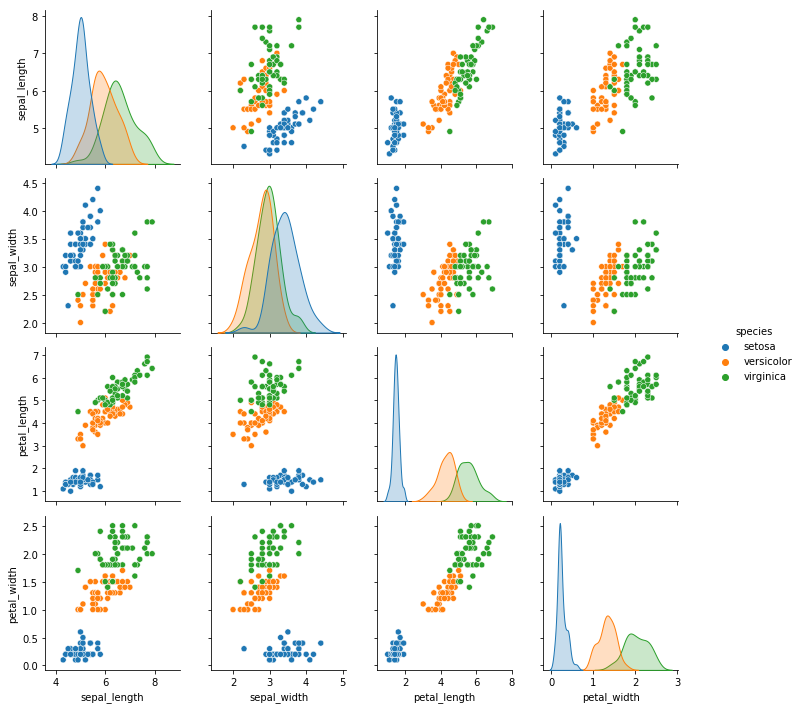

In [1]:
import seaborn as sns
import pandas as pd
import warnings
warnings.simplefilter('ignore')

# load the iris data
df = sns.load_dataset("iris")
g = sns.pairplot(df, hue="species")

In [2]:
df.sample(7)

,sepal_length,sepal_width,petal_length,petal_width,species
10,5.4,3.7,1.5,0.2,setosa
87,6.3,2.3,4.4,1.3,versicolor
143,6.8,3.2,5.9,2.3,virginica
55,5.7,2.8,4.5,1.3,versicolor
133,6.3,2.8,5.1,1.5,virginica
101,5.8,2.7,5.1,1.9,virginica
40,5.0,3.5,1.3,0.3,setosa


In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# Data ini bukan murni Binary Classification
# Kita akan ambil sebagiannya untuk menjadikannya masalah binary classification
set(df['species'].values)

{'setosa', 'versicolor', 'virginica'}

In [5]:
# Bentuk data binary dari sini menggunakan teknik di Modul 03: EDA
# Disimpan dalam variabel baru "df_bin"
df_bin = df[df["species"].isin(['setosa','versicolor']) ]
set(df_bin['species'].values)

{'setosa', 'versicolor'}

In [6]:
df_bin.sample(7)

,sepal_length,sepal_width,petal_length,petal_width,species
68,6.2,2.2,4.5,1.5,versicolor
63,6.1,2.9,4.7,1.4,versicolor
64,5.6,2.9,3.6,1.3,versicolor
52,6.9,3.1,4.9,1.5,versicolor
19,5.1,3.8,1.5,0.3,setosa
24,4.8,3.4,1.9,0.2,setosa
30,4.8,3.1,1.6,0.2,setosa


# Pisahkan menjadi training dan Test Data seperti Module sebelumnya

In [7]:
from sklearn.model_selection import train_test_split

#df = sns.load_dataset("iris")
X_train, X_test, y_train, y_test = train_test_split(df_bin[['sepal_length', 'sepal_width','petal_length','petal_width']], 
                                                    df_bin['species'], test_size=0.5)
print(X_train.shape, X_test.shape)

(50, 4) (50, 4)


# Pemodelan Regresi Logistik menggunakan Python (module SciKit-Learn)

In [8]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)

In [9]:
clf

LogisticRegression()

# Prediksi ke data Test

In [10]:
y_reglog = clf.predict(X_test)
y_reglog

array(['setosa', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'versicolor'], dtype=object)

# Seberapa "baik" prediksi ini? = Akurasi/Evaluasi Model

In [11]:
# Pertama-tama Kita gunakan metric/pengukuran yang umum
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_reglog)

1.0

# contoh data lain: Data Klasifikasi Kanker

* Dapat diunduh dari link ini: https://goo.gl/U2Uwz2
* Link scikit utk datanya: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

In [12]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
type(data), dir(data)

(sklearn.utils.Bunch,
 ['DESCR',
  'data',
  'feature_names',
  'filename',
  'frame',
  'target',
  'target_names'])

In [13]:
X = data.data
print(type(X), X.shape)
X[:3]

<class 'numpy.ndarray'> (569, 30)


array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [14]:
Y = data.target
print(type(Y), Y.shape)
print(data.target_names)
Y[-10:]

<class 'numpy.ndarray'> (569,)
['malignant' 'benign']


array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=99)
print(X_train.shape, X_test.shape)

(284, 30) (285, 30)


In [16]:
clf = LogisticRegression().fit(X_train, y_train)
y_reglog = clf.predict(X_test)
accuracy_score(y_test, y_reglog)
# Masih "mudah", namun lebih baik dari sebelumnya

0.9333333333333333

In [17]:
dir(clf)

['C',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_features_in_',
 'n_iter_',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 'score',
 'set_params',
 'solver',
 'sparsify',
 'tol',
 'verbose',
 'w

In [18]:
# Persamaannya? (ada 30 variabel)
clf.coef_

array([[ 6.04382089e-01, -1.02581962e-01,  6.82260809e-01,
        -2.34275713e-02, -1.79314852e-02, -8.36479804e-02,
        -1.25414425e-01, -5.14175581e-02, -2.14633618e-02,
        -3.18172776e-03,  1.99286560e-02,  2.82620050e-01,
        -4.74317914e-02, -8.25814888e-02, -2.05054118e-03,
        -1.52637735e-02, -2.88206108e-02, -9.52488504e-03,
        -3.18061206e-04, -1.73042195e-03,  6.48531252e-01,
        -1.85578786e-01, -4.75124465e-01, -8.96607929e-03,
        -3.47328694e-02, -2.91519584e-01, -3.89419245e-01,
        -1.17829453e-01, -5.71917543e-02, -2.97209170e-02]])

# Aplikasi di Python untuk metrics diatas:

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('presisi = ', precision_score(y_test, y_reglog))
print('Recall = ', recall_score(y_test, y_reglog))
print('f1_score = ', f1_score(y_test, y_reglog))

presisi =  0.9771428571428571
Recall =  0.9193548387096774
f1_score =  0.9473684210526316


# Atau ...



In [20]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_reglog))
print(classification_report(y_test, y_reglog))

[[ 95   4]
 [ 15 171]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        99
           1       0.98      0.92      0.95       186

    accuracy                           0.93       285
   macro avg       0.92      0.94      0.93       285
weighted avg       0.94      0.93      0.93       285



# Evaluasi yang kita lakukan belum cukup valid/objektif ... Mengapa?

In [21]:
# Cross validation
# Perhatikan variabelnya, kita sekarang menggunakan seluruh data
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
from sklearn.model_selection import cross_val_score
import time

mulai = time.time()
scores_regLog = cross_val_score(clf, X, Y, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
# Interval Akurasi 95 CI 
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Accuracy Regresi Logistik: 0.94 (+/- 0.04), Waktu = 0.942 detik


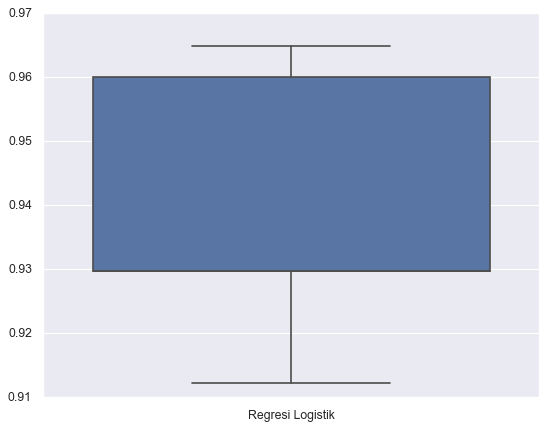

In [22]:
# Kita juga bisa menampilkan BoxPlotnya untuk mendapatkan informasi yang lebih lengkap
%matplotlib inline
import matplotlib.pyplot as plt; plt.style.use('classic')
import seaborn as sns; sns.set()

df = pd.DataFrame({'Regresi Logistik':scores_regLog})
sns.boxplot(data=df)
plt.show()

In [23]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
set(y) # 3 Kategori

{0, 1, 2}

In [24]:
X.shape # 4 variabel, 150 baris

(150, 4)

In [25]:
clf = LogisticRegression(multi_class='ovr').fit(X, y)
clf.coef_
# Perhatikan ada 3 persamaan

array([[-0.44501376,  0.89999242, -2.32353827, -0.97345836],
       [-0.1792787 , -2.12866718,  0.69665417, -1.27480129],
       [-0.39444787, -0.5133412 ,  2.93087523,  2.41709879]])

In [26]:
# Naive Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
nbc = gnb.fit(X_train, y_train)
nbc_prediction = nbc.predict(X_test)

print('Akurasi = ', accuracy_score(y_test, nbc_prediction))
print(confusion_matrix(y_test, nbc_prediction))
print(classification_report(y_test, nbc_prediction))
# Hati-hati Sparse ==> Dense bisa memenuhi memory untuk data relatif cukup besar
# Akurasi cukup baik

Akurasi =  0.9438596491228071
[[ 87  12]
 [  4 182]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        99
           1       0.94      0.98      0.96       186

    accuracy                           0.94       285
   macro avg       0.95      0.93      0.94       285
weighted avg       0.94      0.94      0.94       285



# Aplikasi di Python

In [27]:
# k-NN: http://scikit-learn.org/stable/modules/neighbors.html
from sklearn import neighbors

n_neighbors = 3
weights = 'distance'
kNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
kNN.fit(X_train, y_train)
print('Done!')

Done!


In [28]:
# Prediksi dengan k-NN
y_kNN = kNN.predict(X_test)
y_kNN[-10:]

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1])

In [29]:
# Akurasi
accuracy_score(y_test, y_kNN)

0.9263157894736842

In [30]:
# Cross Validasi
del kNN
kNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

mulai = time.time()
scores_kNN = cross_val_score(kNN, X, y, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
# Interval Akurasi 95 CI 
print("Accuracy kNN: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_kNN.mean(), scores_kNN.std() * 2, waktu))

Accuracy kNN: 0.97 (+/- 0.09), Waktu = 0.068 detik


# Membandingkan model-model yang sudah kita bahas sejauh ini

* Code-nya bisa dimodifikasi sedikit untuk perbandingan model yang lain atau data yang lain

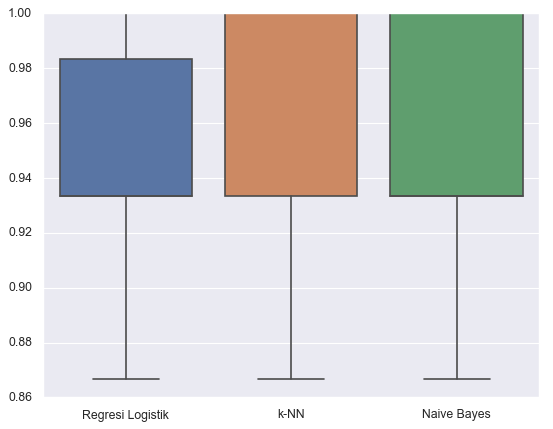

In [31]:
# Model Comparisons using Cross Validation
df = sns.load_dataset("iris")
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
Y = df['species']

Models = [('Regresi Logistik',clf), ('k-NN',kNN), ('Naive Bayes',gnb)]
Scores = {}
for model_name, model in Models:
    if model_name=='Naive Bayes':
        Scores[model_name] = cross_val_score(model, X.values, Y, cv=10,scoring='accuracy')
    else:
        Scores[model_name] = cross_val_score(model, X, Y, cv=10,scoring='accuracy')
        
dt = pd.DataFrame.from_dict(Scores)
ax = sns.boxplot(data=dt)

# <center><font color="blue"> End of Module

<hr />
